In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Specify the path to your CSV file
file_path = "Data/IntegrationData.csv"

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop([df.index[-1]])

# Display the DataFrame (optional)
print(len(df))

33


In [3]:
selected_columns = df[['Name', 'Aarea_hectare', 'Population', 'Traffic_low', 'Income_weekly_pay', 'Average_house_prices ', 'Life_expectancy', 'Good_mental_health_rate']].rename(columns={
    'Name': 'Name_of_Borough',
    'Aarea_hectare': 'Area_of_Borough',
    'Traffic_low': 'Traffic_Flow', 
    'Income_weekly_pay': 'Weekly_Income',
    'Average_house_prices ': 'Average_House_Price',
    'Life_expectancy': 'Life_Expectancy',
    'Good_mental_health_rate': 'Good_Mental_Health_Rate'})

In [ ]:
print(selected_columns)

In [4]:
# Formatting population
columns_need_to_be_cleaned = ['Population']
for m in columns_need_to_be_cleaned:
    selected_columns[m] = (
        selected_columns[m]
        .str.replace(",", "", regex=False)
        .astype("float")
    )

In [5]:
selected_columns['Per_Capita_Area'] = round((selected_columns['Area_of_Borough']*10000) / selected_columns['Population'], 2)

selected_columns['Weekly_Income'] = selected_columns['Weekly_Income'].str.replace('!', '1169.86').astype("float")

selected_columns['Life_Expectancy'] = selected_columns['Life_Expectancy'].str.replace('!', '0').astype("float")
selected_columns['Life_Expectancy'][0] = round(selected_columns['Life_Expectancy'].mean(),2)

selected_columns['Good_Mental_Health_Rate'] = selected_columns['Good_Mental_Health_Rate'].str.replace('!', '0').astype("float")
selected_columns['Good_Mental_Health_Rate'][0] = round(selected_columns['Good_Mental_Health_Rate'].mean(),2)

/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60886/1705291517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Life_Expectancy'][0] = round(selected_columns['Life_Expectancy'].mean(),2)
/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60886/1705291517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Good_Mental_Health_Rate'][0] = round(selected_columns['Good_Mental_Health_Rate'].mean(),2)


In [6]:
# Calculate the covariance matrix
covariance_matrix = selected_columns.cov()

# Extract the covariance values for "Traffic_Flow" with other variables
cov_traffic_flow = covariance_matrix['Traffic_Flow']

print(cov_traffic_flow)

Area_of_Borough            1.287829e+06
Population                 1.859240e+07
Traffic_Flow               2.124869e+05
Weekly_Income             -2.383694e+04
Average_House_Price       -4.681520e+07
Life_Expectancy            2.469152e+01
Good_Mental_Health_Rate    1.048099e+01
Per_Capita_Area            3.037901e+04
Name: Traffic_Flow, dtype: float64


/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60886/2890791635.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = selected_columns.cov()


In [7]:
# Select the columns you want to normalize
columns_to_normalize = ['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate']

# Create a MinMaxScaler
scaler = MinMaxScaler()

selected_columns_normalised = selected_columns[['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Traffic_Flow','Good_Mental_Health_Rate']]

# Apply Min-Max scaling to the selected columns
selected_columns_normalised[columns_to_normalize] = scaler.fit_transform(selected_columns[columns_to_normalize])

/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60886/3299308331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_normalised[columns_to_normalize] = scaler.fit_transform(selected_columns[columns_to_normalize])


In [8]:
selected_columns_normalised.head(6)

,Per_Capita_Area,Population,Weekly_Income,Life_Expectancy,Average_House_Price,Traffic_Flow,Good_Mental_Health_Rate
0,0.582786,0.000000,1.000000,0.312860,0.449908,0.000000,0.500000
1,0.298127,0.523538,0.000000,0.000000,0.000000,0.225653,0.722222
2,0.402571,1.000000,0.100127,0.562380,0.229433,0.707838,0.833333
3,0.505967,0.614228,0.117823,0.579655,0.044673,0.397150,1.000000
4,0.348215,0.816388,0.071087,0.619002,0.180110,0.397625,0.611111
5,1.000000,0.829270,0.238823,0.806142,0.138985,0.589074,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

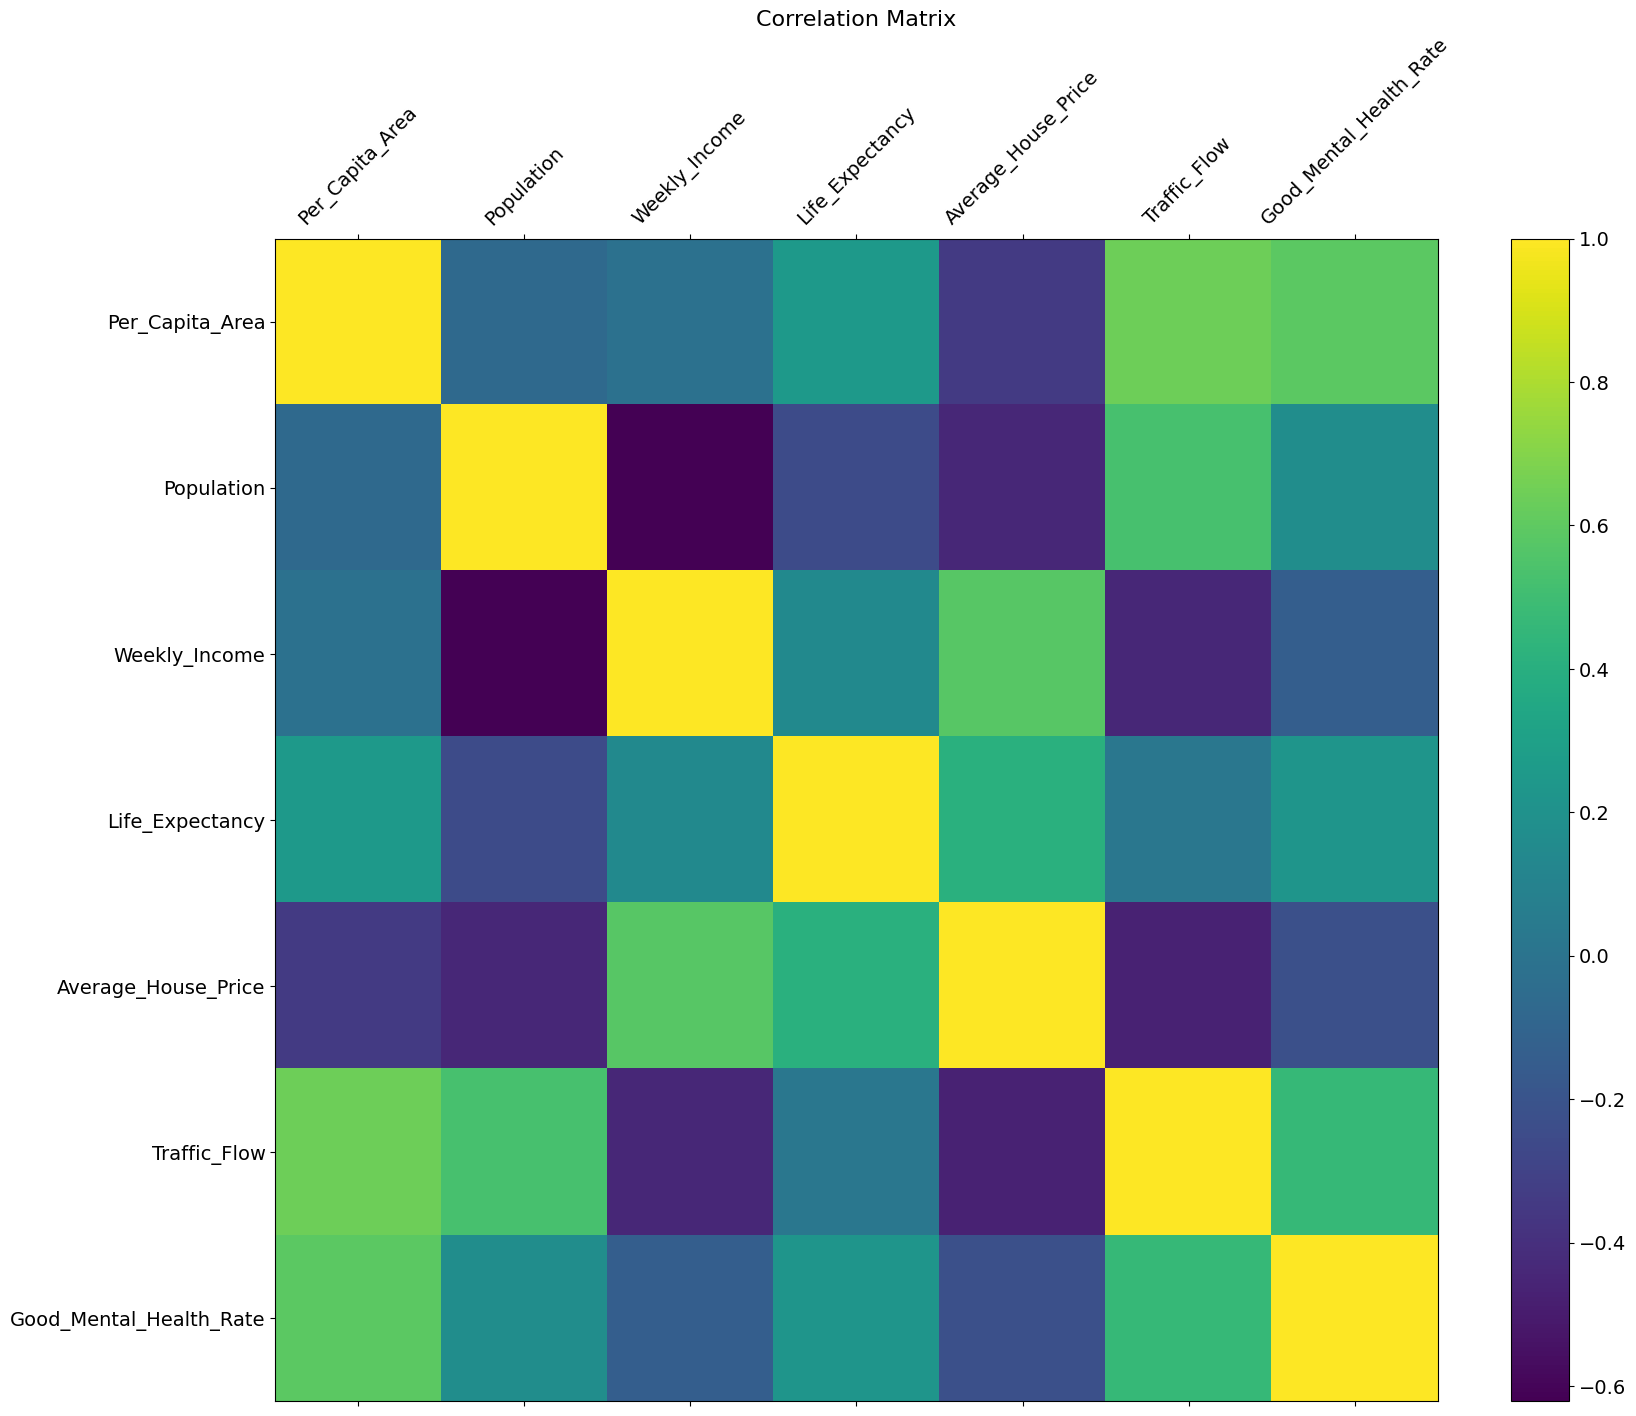

In [9]:
f = plt.figure(figsize=(19, 15)) # creates a new figure, sets length and width
plt.matshow(selected_columns_normalised.corr(), fignum=f.number) # matshow - creates matrix plot for selected_columns_normalised.corr(), fignum - assigned number for when there is multiple figures plotted
plt.xticks(range(selected_columns_normalised.select_dtypes(['number']).shape[1]), selected_columns_normalised.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(selected_columns_normalised.select_dtypes(['number']).shape[1]), selected_columns_normalised.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

In [13]:
# selected_columns_normalised = selected_columns_normalised[['Per_Capita_Area', 'Population', 'Weekly_Income', 'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate']]

In [10]:
selected_columns_normalised.columns

Index(['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy',
       'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate'],
      dtype='object')

In [11]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [19]:
selected_columns_normalised.columns

Index(['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy',
       'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate'],
      dtype='object')

In [20]:
selected_columns_normalised_after_VIF = drop_column_using_vif_(selected_columns_normalised)

In [21]:
selected_columns_normalised_after_VIF.columns

Index(['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy',
       'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate'],
      dtype='object')

In [14]:
Independent_Variables = selected_columns_normalised_after_VIF[['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Good_Mental_Health_Rate']]
Dependent_Variable = selected_columns_normalised_after_VIF['Traffic_Flow']
Traffic_Flow_OLS_Model = sm.OLS(Dependent_Variable, Independent_Variables).fit()
Traffic_Flow_OLS_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Traffic_Flow   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              65.44
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                    8.16e-15
Time:                        14:23:52   Log-Likelihood:                          26.650
No. Observations:                  33   AIC:                                     -41.30
Df Residuals:                      27   BIC:                                     -32.32
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Per_Capita_Area             0.6391      0.119      5.354      0.000       0.394       0.884
Population                  0.4372      0.071      6.135      0.000       0.291       0.583
Weekly_Income              -0.3471      0.152     -2.278      0.031      -0.660      -0.034
Life_Expectancy            -0.1007      0.109     -0.923      0.364      -0.325       0.123
Average_House_Price         0.1507      0.168      0.895      0.379      -0.195       0.496
Good_Mental_Health_Rate    -0.0639      0.101     -0.630      0.534      -0.272       0.144
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.579
Skew:                           0.324   Prob(JB):                        0.749
Kurtosis:                       3.035   Cond. No.                         12.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Independent_Variables_Best = selected_columns_normalised_after_VIF[['Population', 'Average_House_Price', 'Good_Mental_Health_Rate']]
#Independent_Variables_Best = selected_columns_normalised_after_VIF[['Average_House_Price', 'Per_Capita_Area', 'Good_Mental_Health_Rate']]
Independent_Variables_Best = selected_columns_normalised_after_VIF[['Per_Capita_Area', 'Population', 'Weekly_Income']]
Dependent_Variable_Best = selected_columns_normalised_after_VIF['Traffic_Flow']
Traffic_Flow_OLS_Model_Best = sm.OLS(Dependent_Variable_Best, Independent_Variables_Best).fit()
Traffic_Flow_OLS_Model_Best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Traffic_Flow   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              137.1
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                    1.32e-17
Time:                        14:47:14   Log-Likelihood:                          25.746
No. Observations:                  33   AIC:                                     -45.49
Df Residuals:                      30   BIC:                                     -41.00
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Per_Capita_Area     0.5308      0.075      7.059      0.000       0.377       0.684
Population          0.3921      0.045      8.743      0.000       0.301       0.484
Weekly_Income      -0.2912      0.099     -2.936      0.006      -0.494      -0.089
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.385
Skew:                           0.641   Prob(JB):                        0.303
Kurtosis:                       3.303   Cond. No.                         4.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

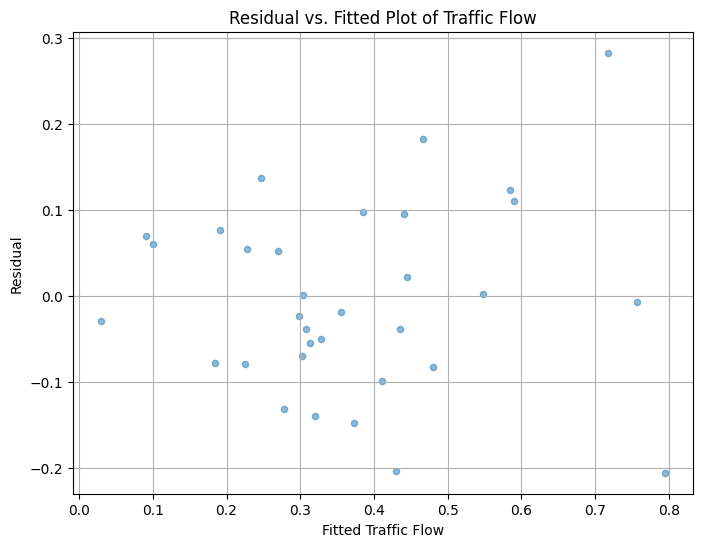

In [16]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(Traffic_Flow_OLS_Model.fittedvalues, Traffic_Flow_OLS_Model.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted Traffic Flow')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Traffic Flow')
# Adding grid lines
plt.grid(True)
plt.show()

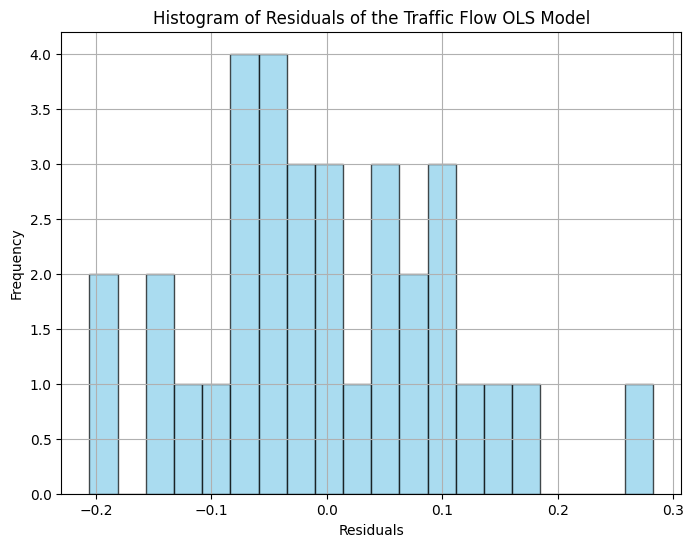

In [17]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(Traffic_Flow_OLS_Model.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Traffic Flow OLS Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

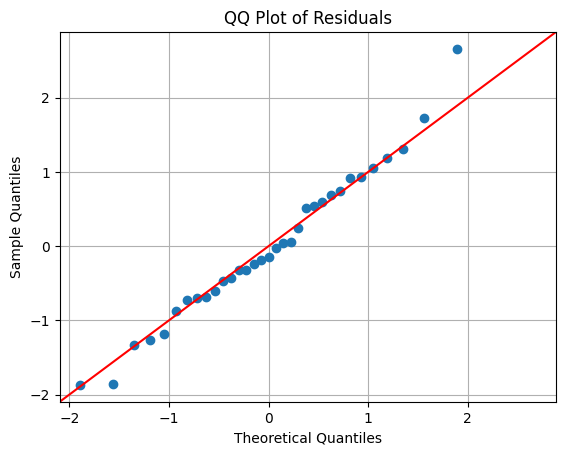

In [18]:
# (optional) the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(Traffic_Flow_OLS_Model.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

compare the result with our knowledge
model does matter. you can first inroduct how much variance you can explain to this model. Also after testing conditions we found some fit some not. then compare with our own knowledge.

focus on the key things

high relation --> good!